In [1]:
!wget https://www.dropbox.com/s/nf48bb0phzm2exk/Lab3.zip
!unzip Lab3.zip
!rm Lab3.zip

--2022-04-15 03:49:31--  https://www.dropbox.com/s/nf48bb0phzm2exk/Lab3.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nf48bb0phzm2exk/Lab3.zip [following]
--2022-04-15 03:49:31--  https://www.dropbox.com/s/raw/nf48bb0phzm2exk/Lab3.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc10da40d9fafd61422602ab4d2b.dl.dropboxusercontent.com/cd/0/inline/BjZAFl7Kg4yaQF9e29odMrl9wXVeVW_9miV7AnoxfMlmZGuXHS1evJMZokfZi-K_-FArA41HuHDCRswkWwckWHK8zvAVXkca4Z9S5fdFqCC5ILwS6yJEnReLqaqYXZSU_GDVMVHdrVLtABRU0vI8DsP76Wk4eMZrUOqoX22O3y7WnA/file# [following]
--2022-04-15 03:49:32--  https://uc10da40d9fafd61422602ab4d2b.dl.dropboxusercontent.com/cd/0/inline/BjZAFl7Kg4yaQF9e29odMrl9wXVeVW_9miV7AnoxfMlmZGuXHS1evJMZokfZi-K_-FArA41HuHDCRswk

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Contrast Stretching

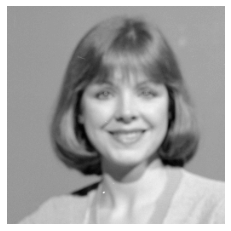

In [3]:
# image before contrast stretching
lady_img = cv2.imread('./Lab3/lady_img.png', 0)
plt.imshow(lady_img, cmap='gray'), plt.axis("off")
plt.show()

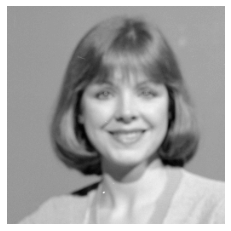

In [4]:
plt.imshow(lady_img, cmap='gray'), plt.axis("off")
plt.show()

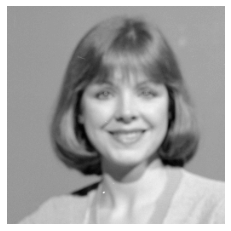

In [5]:
# image after contrast stretching
"""Write your code here"""
def contrast_stretching(img,i_max=255,i_min=0):
  img=(img-np.min(img))*((i_max-i_min)/(np.max(img)-np.min(img)))+i_min
  plt.imshow(img, cmap='gray'), plt.axis("off")
  plt.show()
contrast_stretching(lady_img)

### Histogram Equalization

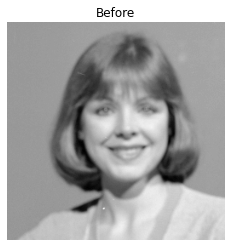

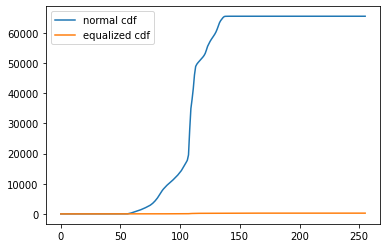

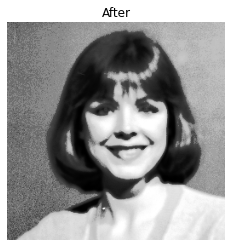

In [6]:
# image before histogram equalization
plt.imshow(lady_img, cmap='gray'), plt.axis("off")
plt.title('Before')
plt.show()
# image after histogram equalization
histr = cv2.calcHist([lady_img],[0],None,[256],[0,256])
histreq=histr/np.prod(lady_img.shape)
sums=np.cumsum(histreq)*(255)
img2 = sums[lady_img]
plt.plot(np.cumsum(histr),label='normal cdf')
plt.plot(sums,label='equalized cdf')
plt.legend()
plt.show()
plt.imshow(img2, cmap='gray'), plt.axis("off")
plt.title("After")
plt.show()

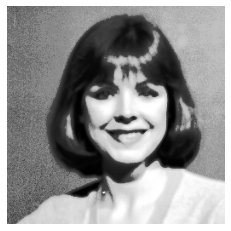

In [7]:
# image after histogram equalization
"""Write your code here"""
L=255
eq_lady_img=cv2.equalizeHist(lady_img)
plt.imshow(eq_lady_img, cmap='gray'), plt.axis("off")
plt.show()

### Automatic Thresholding

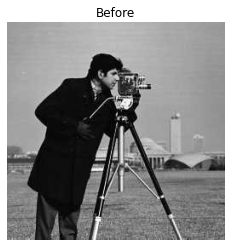

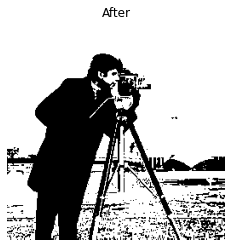

(112, 0, 255)

In [8]:
# image before thresholding
camera_man_img = cv2.imread('./Lab3/camera_man.jpg', 0)
plt.title("Before")
plt.imshow(camera_man_img, cmap='gray'), plt.axis("off")
plt.show()

# image after thresholding
def thresh(img): # used for binary images only
  p_min=np.min(img)
  p_max=np.max(img)
  T_0=(p_min+p_max)//2
  #hist = cv2.calcHist([img],[0],None,[256],[0,256])
  n=0
  while True:
    n+=1
    pre_avg=img[img<T_0]
    pre_percentage=np.sum(img[img<T_0].astype(dtype=bool))/len(img.flatten())
    pre_avg=np.mean(img[pre_avg])
    post_avg=img[img>=T_0]
    post_percentage=np.sum(img[img>=T_0].astype(dtype=bool))/len(img.flatten())
    post_avg=np.mean(img[post_avg])
    #print(T_0,pre_avg,post_avg,pre_percentage,post_percentage)
    if int((pre_avg*pre_percentage+post_avg*post_percentage))==T_0 or n>127:
      break
    T_0=int((pre_avg*pre_percentage+post_avg*post_percentage))
  th,img=cv2.threshold(img,int(round(T_0)),p_max,cv2.THRESH_BINARY)
  plt.title("After")
  plt.imshow(img, cmap='gray'), plt.axis("off")
  plt.show()
  return int(T_0),p_min,p_max
thresh(camera_man_img)

##### Python Different Thresholding Methods

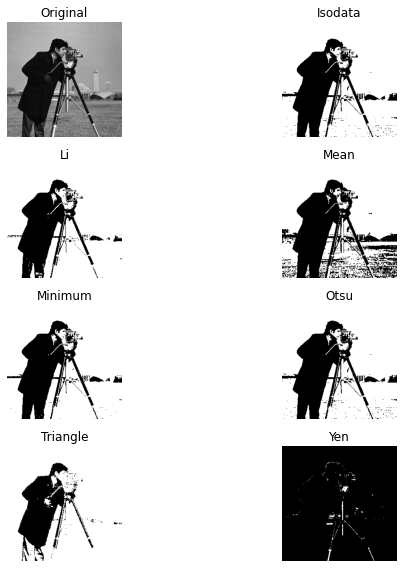

In [9]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(camera_man_img, figsize=(10, 8), verbose=False)
plt.show()

### Kmeans & Fuzzy c-means

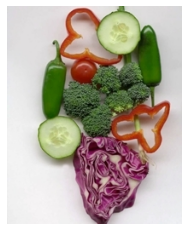

In [10]:
veggie_img_bgr = cv2.imread('./Lab3/veggie.jpg', cv2.IMREAD_COLOR)
veggie_img = cv2.cvtColor(veggie_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(veggie_img), plt.axis("off")
plt.show()

### Kmeans using color information

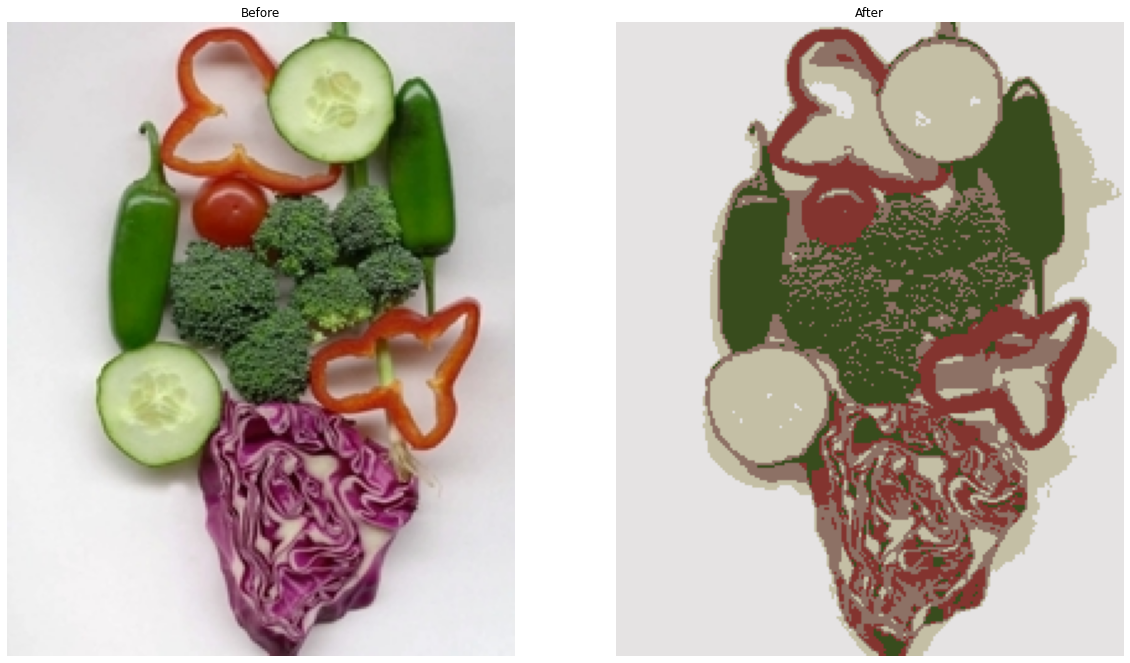

In [49]:
from sklearn.cluster import KMeans
X = veggie_img.flatten().reshape(np.prod(veggie_img.shape[0:2]), 3)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
fig=plt.figure(figsize=(20,15))
fig.add_subplot(1,2,1)
plt.imshow(veggie_img), plt.axis('off')
plt.title("Before");
centers=kmeans.cluster_centers_
labels=kmeans.labels_               
centers = np.round(centers).astype(dtype='uint8')
segmented_image = centers[labels]

segmented_image = segmented_image.reshape(veggie_img.shape)
fig.add_subplot(1,2,2)
plt.imshow(segmented_image),plt.axis("off")
plt.title("After");

### Kmeans using color and spatial information

Text(0.5, 1.0, 'After')

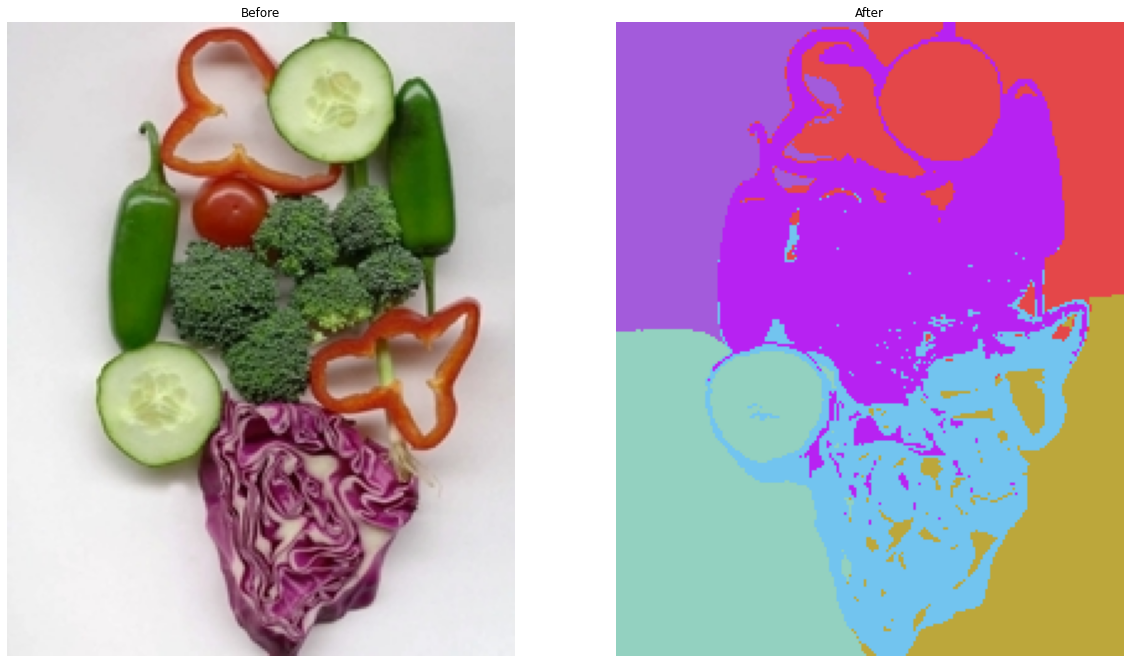

In [47]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
X = veggie_img.flatten().reshape(np.prod(veggie_img.shape[0:2]), 3)
X_loc=np.array([[i,j] for i in range(veggie_img.shape[0]) for j in range(veggie_img.shape[1])])
X=np.concatenate([X,X_loc],axis=1)
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
sklearn_pca = PCA(n_components=3)

#centers=np.array(list(map(lambda x:x[:3],kmeans.cluster_centers_)))
fig=plt.figure(figsize=(20,15))
fig.add_subplot(1,2,1)
plt.imshow(veggie_img), plt.axis('off')
plt.title("Before")
centers = sklearn_pca.fit_transform(kmeans.cluster_centers_)
labels=kmeans.labels_               
centers = np.round(centers).astype(dtype='uint8')
segmented_image = centers[labels]

segmented_image = segmented_image.reshape(veggie_img.shape)
fig.add_subplot(1,2,2)
plt.imshow(segmented_image),plt.axis("off")
plt.title("After")

In [13]:
!pip install scikit-fuzzy
!pip install fuzzy-c-means

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=94d315ca1b3d3c5c1deaf62c28e684b44736b1c5584db8c4e4f76c674332959e
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
     |████████████████████████████████| 10.9 MB 5.1 MB/s 


### Cmeans using color information

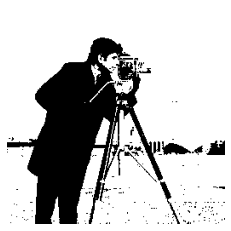

In [14]:
import skfuzzy as fuzz
from fcmeans import FCM
# Visit https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html
X = camera_man_img.flatten().reshape(-1,1)
my_model = FCM(n_clusters=2) # we use two cluster as an example
my_model.fit(X) ## X, numpy array. rows:samples columns:features
centers = my_model.centers
labels = my_model.predict(X)
centers = np.round(centers).astype(dtype='uint8')
segmented_image = centers[labels]

segmented_image = segmented_image.reshape(camera_man_img.shape)

plt.imshow(segmented_image,cmap='gray'), plt.axis("off")
plt.show()

### Cmeans using color and spatial information

[[156.85661386  85.27236488 160.48529109]
 [ 75.87083737 168.45797293  95.21965272]]
[[ 66.59231362]
 [-66.59231362]]


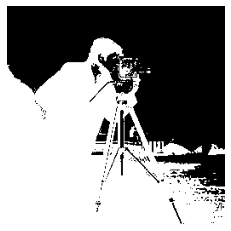

In [28]:
import skfuzzy as fuzz
from fcmeans import FCM
# Visit https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html
X = camera_man_img.flatten().reshape(-1,1)
X_loc=np.array([[i,j] for i in range(camera_man_img.shape[0]) for j in range(camera_man_img.shape[1])])
X=np.concatenate([X,X_loc],axis=1)
my_model = FCM(n_clusters=2) # we use two cluster as an example
my_model.fit(X)
centers = my_model.centers
#print(centers)
sklearn_pca = PCA(n_components=1)

centers = sklearn_pca.fit_transform(centers)
print(centers)
#centers=np.array(list(map(lambda x:x[:1],centers)))
labels = my_model.predict(X)
centers = np.round(centers).astype(dtype='uint8')
segmented_image = centers[labels]

segmented_image = segmented_image.reshape(camera_man_img.shape)

plt.imshow(segmented_image,cmap='gray'), plt.axis("off")
plt.show()